In [1164]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt


# Please find the data source below:
Data Set: Gapminder World has been used for all three data sets.

agri_land_area: Environment > Geography > Agriculture Land

Forest_area: Environment > Geography > Forest Area

yearly_co2_emissions_1000_tonnes: Environment > Emissions > CO2 emissions yearly

# References: 
www.Stackflow.com

# Introduction

CO2 is one of the greenhouse gases which can increase by some primary sources such as agricultue and forestry (landuse activities). Conserving forests could cut CO2 emissions; on the other hand, CO2 could increase from agriculture activities such as livestock, agricultural soils, and rice production. 
In order to do the project three datasets are selected from the Environment dataset originated from the gapminder website.
The three datasets namely are Agriculture Land, Forest Area and CO2 Emissions (dependent variables).
Datasets of four countries were selected from 1991 to 2014 years (independent variables) to compare the CO2 emissions. All countries showed some increase in CO2 emissions. 
Deforestation and agriculture can influence CO2 emissions, so we looked at these two categories in Brazil to see if there is any correlation between them and the CO2 emissions. 



In [1165]:
#Reading data

In [1166]:
df_agr = pd.read_csv('agri_land_area.csv')

In [1167]:
df_CO2 = pd.read_csv('yearly_co2_emissions_1000_tonnes.csv')

In [1168]:
df_forest = pd.read_csv('forest_area.csv')

# Wrangling 
After reading data in the preceding cells, data were assessed(missing, duplicate, datatype and structure errors).

In [1169]:
#Assessing 

In [1170]:
df_agr.isnull().sum().any()  #to look for missing data

False

In [1171]:
df_agr.duplicated().any() #to look for duplicated data

False

In [1172]:
df_agr.info() # to check the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 2 columns):
Year      45 non-null int64
Brazil    45 non-null float64
dtypes: float64(1), int64(1)
memory usage: 800.0 bytes


In [1173]:
df_forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 2 columns):
Year      26 non-null int64
Brazil    26 non-null int64
dtypes: int64(2)
memory usage: 496.0 bytes


# Cleaning: 
iloc is used to select data from 1991 to 2014.

Country column needed to be renamed to Year for all three datasets.

In [1174]:
#Emission

In [1175]:
df_CO2_edited = df_CO2.iloc[ 89: , : ]

In [1176]:
df_CO2_edited.to_csv('yearly_co2.csv', index = False)

In [1177]:
df_CO2 = pd.read_csv('yearly_co2.csv')

In [1178]:
df_CO2= df_CO2_edited.rename(columns = {'country':'Year'})

In [1179]:
df_CO2.shape

(24, 6)

In [1180]:
#Forest

In [1181]:
df_forest_edited = df_forest.iloc[ 1: 25 : ] 

In [1182]:
df_forest_edited.to_csv('df_forest.csv', index = False)

In [1183]:
df_forest = pd.read_csv('df_forest.csv')

In [1184]:
df_forest= df_forest_edited.rename(columns = lambda x : x.replace('Brazil','Forest'))

In [1199]:
df_forest.shape

(24, 2)

In [1186]:
#Agriculture Area

In [1187]:
df_agr_edited = df_agr.iloc[ 20:44 : ] 

In [1188]:
df_agr_edited.to_csv('df_ag.csv', index = False)

In [1189]:
df_agr = pd.read_csv('df_ag.csv')

In [1190]:
df_agr= df_agr_edited.rename(columns = lambda x : x.replace('Brazil','Agriculture'))

In [1198]:
df_agr.shape

(24, 2)

# Exploratory Data Analysis

The below three graphs represent the forest and agriculture area per year in Brazil and CO2 emission per year for the four selected countries. The first graph shows that the CO2 emission trends in all four countries increasing over time which could be caused by deforestation and agriculture activities.  


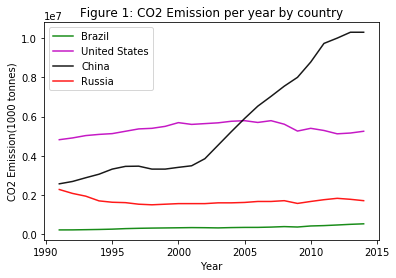

In [1212]:
x = df_CO2['Year']
y = df_CO2['Brazil']
y1 = df_CO2['United States']
y2 = df_CO2['China']
y3 = df_CO2['Russia']
y4 = df_CO2['Germany']
 
plt.title('Figure 1: CO2 Emission per year by country')
plt.xlabel("Year")
plt.ylabel("CO2 Emission(1000 tonnes)")

plt.plot(x,y, c='g', alpha=0.9, label = 'Brazil')
plt.plot(x,y1,c='m', alpha=0.9, label = 'United States')
plt.plot(x,y2,c='k', alpha=0.9, label = 'China')
plt.plot(x,y3,c='r', alpha=0.9, label = 'Russia')
plt.legend()

matplotlib.pyplot.show()

Figure 2 shows forest land is decreasing rapidly every year in Brazil which could lead to more CO2 emissions.
Figure 3 illustrates that agriculture land in Brazil over time is rapidly booming which could also be considered another resean in CO2 emission increase. 
Overall by looking at the three graphs, we can answer to the question that how deforestation and agriculture are associated to CO2 emission.

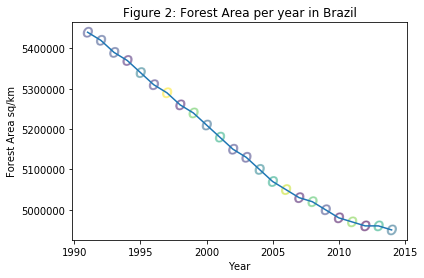

In [1206]:
y = df_forest['Forest']
x = df_forest['Year']
plt.title('Figure 2: Forest Area per year in Brazil')
plt.xlabel("Year")
plt.ylabel("Forest Area sq/km")
N=24
colors=np.random.rand(N)
area=100
matplotlib.pyplot.scatter(x,y, s=area, c=colors, alpha=0.4, marker = '$O$')
plt.plot(x,y)
matplotlib.pyplot.show()


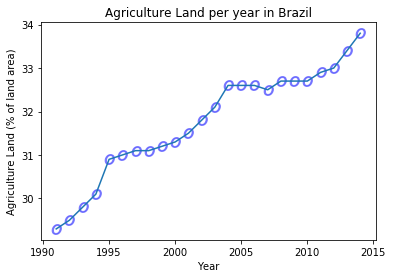

In [1195]:
x = df_agr['Year']
y = df_agr['Agriculture']
plt.title('Agriculture Land per year in Brazil')
plt.xlabel("Year")
plt.ylabel("Agriculture Land (% of land area)")
area=100
matplotlib.pyplot.scatter(x,y, s=area, c='b', alpha=0.4, marker = '$O$')
plt.plot(x,y)
matplotlib.pyplot.show()